In [164]:
import networkx as nx

# drawing graphs using matplotlib
from networkx.drawing.nx_pylab import draw_networkx
from networkx.drawing.layout import bipartite_layout

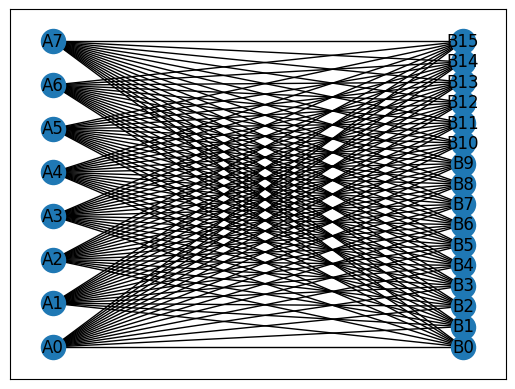

In [165]:
# Parameters for the simpler prototype
num_A = 8  # Number of A-nodes
num_B = 16  # Number of B-nodes
max_degree_A = 4  # Each A-node can connect to at most 4 B-nodes
max_degree_B = 2  # Each B-node can connect to at most 2 A-nodes

# Create a complete bipartite graph K(A, B)
G_simple = nx.complete_bipartite_graph(num_A, num_B)

# Relabel nodes to "A0, A1, ..." and "B0, B1, ..."
A_nodes_simple = [f"A{i}" for i in range(num_A)]
B_nodes_simple = [f"B{i}" for i in range(num_B)]
mapping = {i: A_nodes_simple[i] for i in range(num_A)}
mapping.update({i + num_A: B_nodes_simple[i] for i in range(num_B)})
G_simple = nx.relabel_nodes(G_simple, mapping)
pos = bipartite_layout(G_simple, A_nodes_simple)
draw_networkx(G_simple, pos)

In [166]:
# # get degees of all nodes
# for node in G_simple.nodes():
#     print(f"Degree of {node}: {G_simple.degree(node)}")

# delete random edges until max_degree_A and max_degree_B are satisfied
while True:
    # get degrees of all nodes
    degrees = {node: G_simple.degree(node) for node in G_simple.nodes()}
    # check if all degrees are within the limits
    if all(degrees[node] <= max_degree_A for node in A_nodes_simple) and all(
        degrees[node] <= max_degree_B for node in B_nodes_simple
    ):
        break
    # get a random edge
    edge = list(G_simple.edges())[np.random.randint(len(G_simple.edges))]
    # delete the edge
    G_simple.remove_edge(*edge)

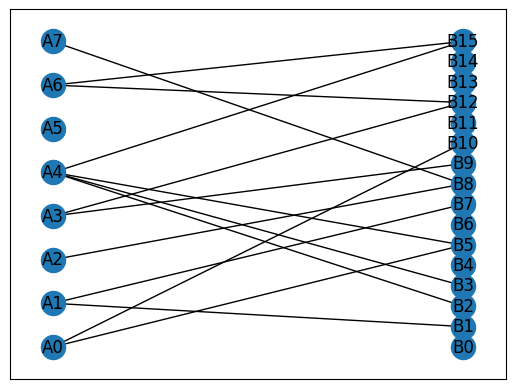

In [167]:
pos = bipartite_layout(G_simple, A_nodes_simple)
draw_networkx(G_simple, pos)

Number of colors used for projected graph: 2


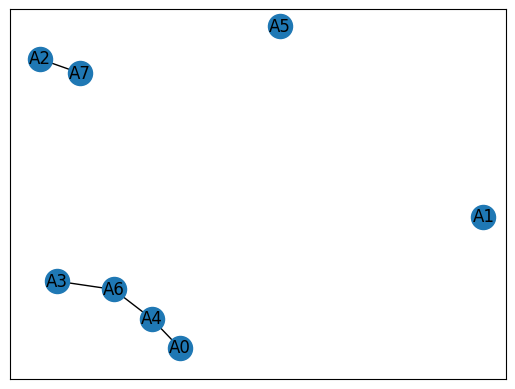

In [168]:
G_A_projected = nx.bipartite.projected_graph(G_simple, A_nodes_simple)
# Check the number of colors needed for M-colorability
is_M_colorable_projected = nx.coloring.greedy_color(
    G_A_projected, strategy="largest_first"
)
num_colors_used_projected = len(set(is_M_colorable_projected.values()))
print(f"Number of colors used for projected graph: {num_colors_used_projected}")
draw_networkx(G_A_projected)

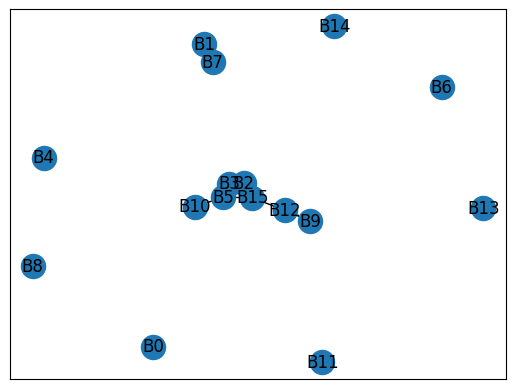

In [169]:
G_B_projected = nx.bipartite.projected_graph(G_simple, B_nodes_simple)
draw_networkx(G_B_projected)